In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# datasets = ["Reserve_MDP_81_6", "Reserve_MDP_81_6", "Reserve_MDP_729_8", "Reserve_MDP_2187_9"]
datasets = ["Reserve_MDP_81_6","Reserve_MDP_243_7", "Reserve_MDP_729_8"]
models = ["GCN_weighted", "GCN_NoLR_test"]
results = ["training_loss", "test_loss", "test_gap", "test_error", "test_recall", "test_accuracy"]
max_epoch = 3000

FileNotFoundError: [Errno 2] No such file or directory: 'Results/GCN_NoLR_test/Reserve_MDP_81_6/test_accuracy.csv'

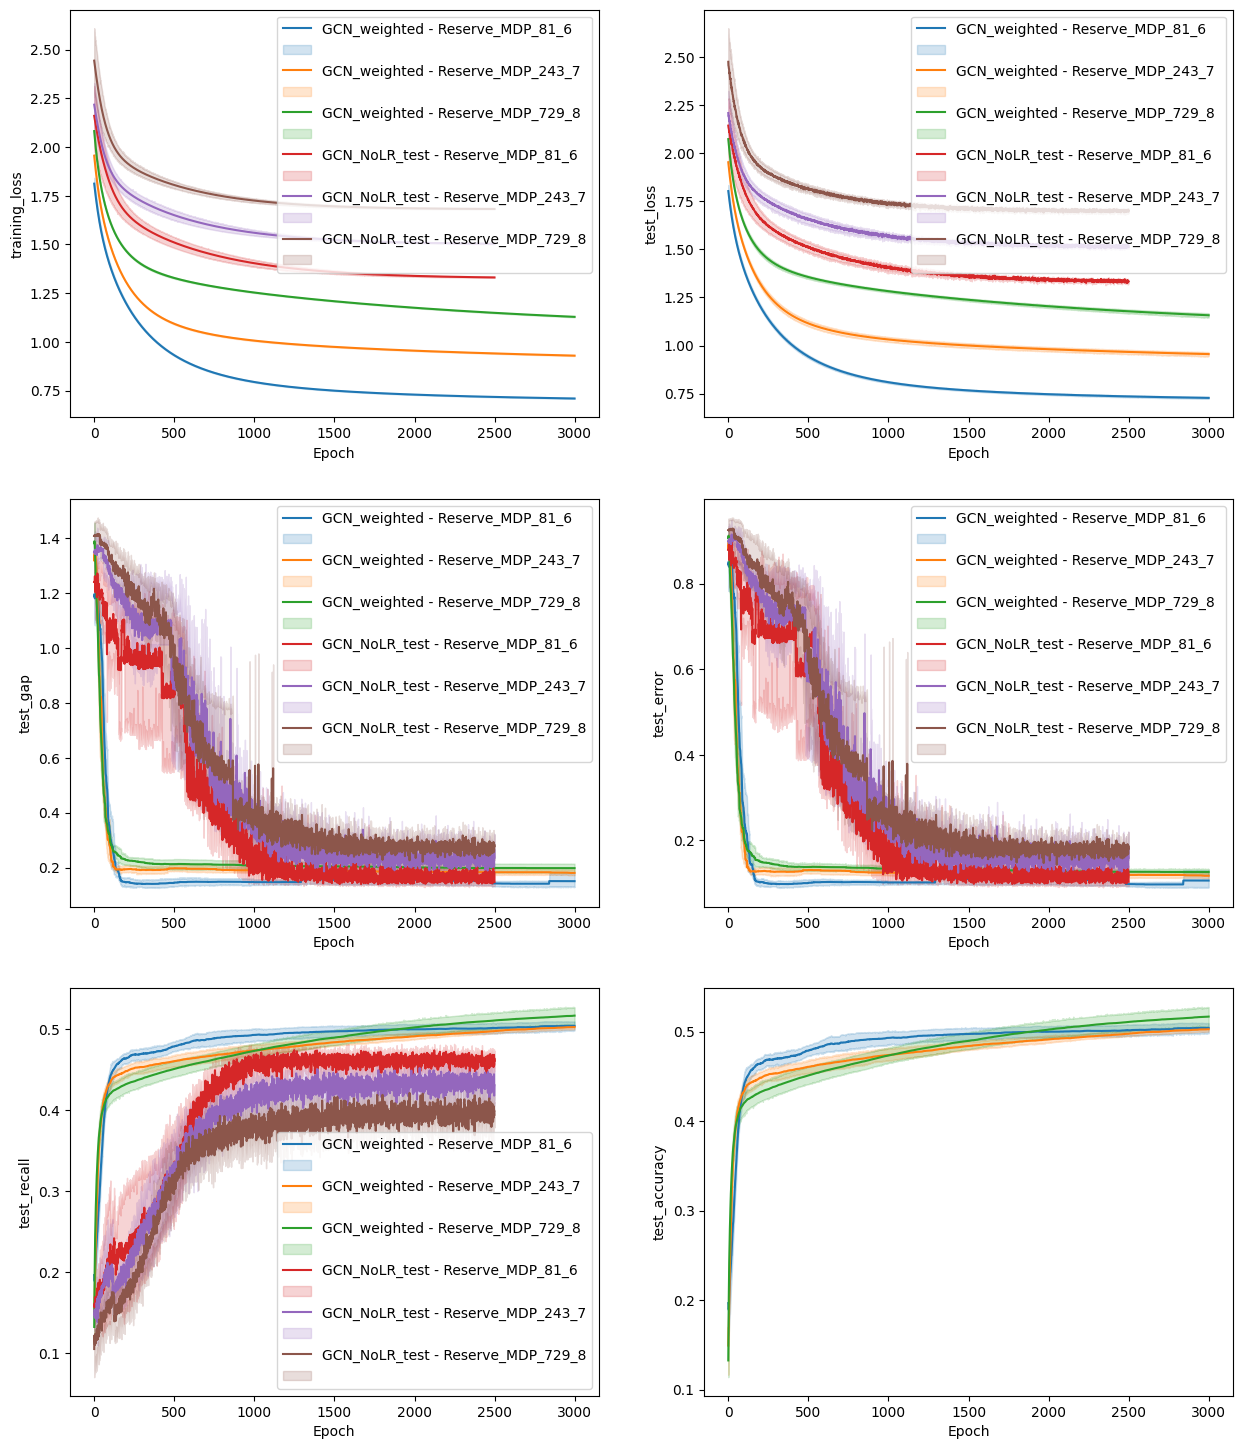

In [15]:
n_plots = 5
n_cols = 2
n_rows = int((n_plots + n_plots%2)/2)

fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 6*n_rows))

count = 0
for result in results:
    col = count %2
    row = count //2 
    count += 1
    legend = []
    for model in models:
        for dataset in datasets:
            try:
                df = pd.read_csv(f"Results/{model}/{dataset}/{result}.csv", index_col=0)

                df_long = df[df.index < max_epoch].stack()
                df_long.index = df_long.index.to_flat_index().map(lambda x: x[0])
                sns.lineplot(df_long, errorbar='ci', ax=ax[row, col])
                ax[row, col].set_ylabel(result)
                ax[row, col].set_xlabel("Epoch")

                legend.append(f"{model} - {dataset}")
                legend.append("")
            except:
                pass
    ax[row, col].legend(legend)

In [16]:
from collections import defaultdict

In [17]:
final_values = defaultdict(dict)
for result in results:
    col = count %2
    row = count //2 
    count += 1
    legend = []
    for model in models:
        for dataset in datasets:
            df = pd.read_csv(f"Results/{model}/{dataset}/{result}.csv", index_col=0)
            final_values[f"{model}-{dataset}"][result] = f"{df.iloc[-1].mean():.4f} +- {1.96*df.iloc[-1].std()/np.sqrt(df.iloc[-1].size):.4f}"
    #     break
    # break


FileNotFoundError: [Errno 2] No such file or directory: 'Results/GCN_NoLR_test/Reserve_MDP_81_6/test_accuracy.csv'

In [18]:
final_df = pd.DataFrame(final_values).T
final_df.index = pd.MultiIndex.from_tuples(list(final_df.index.map(lambda x: x.split("-"))))

In [19]:
final_df[["test_gap", "test_error", "test_recall", "test_accuracy"]]

test_gap        test_error  \
GCN_weighted  Reserve_MDP_81_6   0.1508 +- 0.0271  0.1062 +- 0.0230   
              Reserve_MDP_243_7  0.1810 +- 0.0122  0.1174 +- 0.0078   
              Reserve_MDP_729_8  0.1982 +- 0.0191  0.1262 +- 0.0081   
GCN_NoLR_test Reserve_MDP_81_6   0.1477 +- 0.0084  0.1034 +- 0.0074   
              Reserve_MDP_243_7  0.2365 +- 0.0405  0.1592 +- 0.0283   
              Reserve_MDP_729_8  0.2782 +- 0.0521  0.1807 +- 0.0286   

                                      test_recall     test_accuracy  
GCN_weighted  Reserve_MDP_81_6   0.5040 +- 0.0064  0.5040 +- 0.0064  
              Reserve_MDP_243_7  0.5025 +- 0.0030  0.5025 +- 0.0030  
              Reserve_MDP_729_8  0.5167 +- 0.0120  0.5167 +- 0.0120  
GCN_NoLR_test Reserve_MDP_81_6   0.4610 +- 0.0086               NaN  
              Reserve_MDP_243_7  0.4307 +- 0.0201               NaN  
              Reserve_MDP_729_8  0.3943 +- 0.0187               NaN